# Usage Examples


## Imports Used for All Examples

In [92]:
from pypssfss import (analyze, atoutputs, extract_result, inch, Layer, 
                      mil, mm, plot_sheet, polyring, res2fresnel, ThetaPhi)
import numpy as np
from matplotlib import pyplot as plt

## Class A Radome
This example is from from Y. T. Lo and S. W. Lee, *Antenna Handbook*, pp. 31-17 through 31-18

### Specify the radome dielectric layers in `strata`

In [93]:
skin = Layer(epsr=3.2, tandel=0.015, width=35*mil)
strata = [Layer(),
          skin,
          Layer(epsr=1.1, tandel=0.005, width=0.25*inch),
          skin,
          Layer()]

### Specify desired frequencies and scan angles

In [94]:
freqs = np.linspace(2, 16, 100)
scan = ThetaPhi([0, 40, 60, 70, 80], 0)

### Analyze the radome performance

In [95]:
results = analyze(strata, freqs, scan, showprogress=False)

### Extract frequency, scan angle, and transmission coefficients from computed results

In [96]:
datamat = extract_result(results, atoutputs("fghz theta s21mag(te,te) s21mag(tm,tm)"))
f, thetas, s21magte, s21magtm = map(np.array, zip(*datamat))
tepwr = s21magte ** 2
tmpwr = s21magtm ** 2

### Plot TE transmitted power versus frequency for each scan angle
Compare to plot 31-14a on page 31-18 of Lo and Lee.

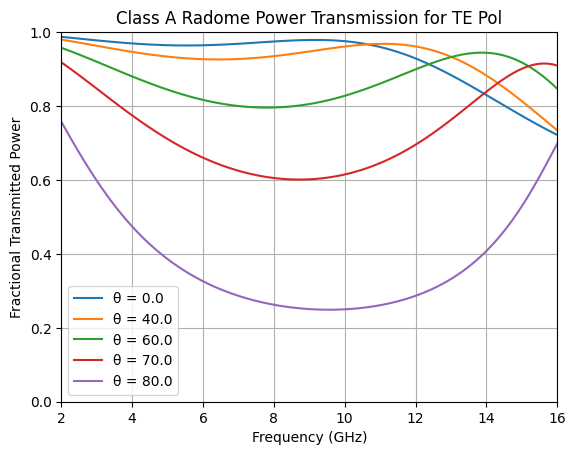

In [97]:
for theta in np.unique(thetas):
    ind = theta == thetas
    plt.plot(f[ind], tepwr[ind], label = f'θ = {theta}')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fractional Transmitted Power')
plt.title('Class A Radome Power Transmission for TE Pol')
plt.ylim(0, 1); plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(2, 16); plt.xticks(np.arange(2, 17, 2)); plt.grid(True)
plt.show()


### Plot TM transmitted power versus frequency for each scan angle
Compare to plot 31-14b on page 31-18 of Lo and Lee.

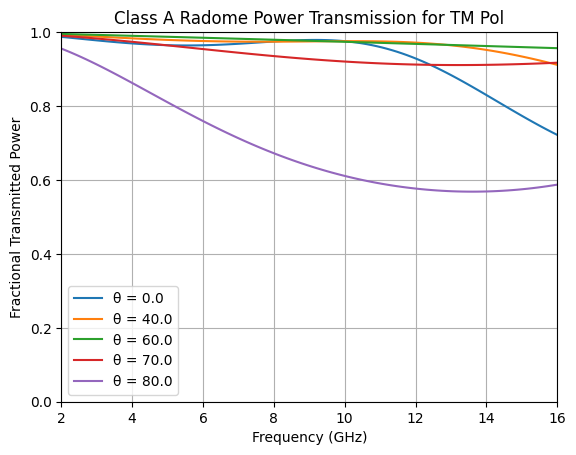

In [98]:
for theta in np.unique(thetas):
    ind = theta == thetas
    plt.plot(f[ind], tmpwr[ind], label = f'θ = {theta}')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fractional Transmitted Power')
plt.title('Class A Radome Power Transmission for TM Pol')
plt.ylim(0, 1); plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(2, 16); plt.xticks(np.arange(2, 17, 2)); plt.grid(True)
plt.show()


## Double Square Loop FSS Exported to HFSS Fresnel Table
This example is adapted from "Antenna Radome SBR+ Using Fresnel Boundary" beginning on the page labeled "1-66" of the 2024R2 HFSS Help PDF file.

### Create and plot the sheet triangulation

RWGSheet: style=polyring, class=J, 1136 nodes, 3032 edges, 1896 faces, Zs=0.0 + 0.0im Ω


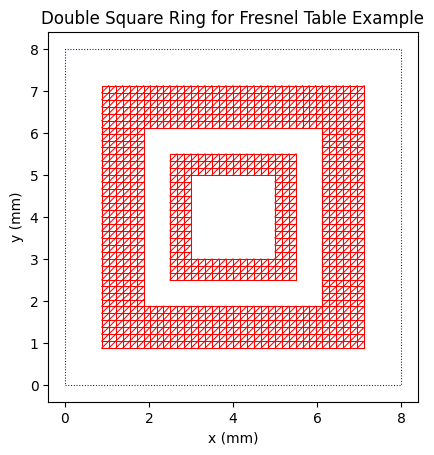

In [99]:
a = np.sqrt(2) * np.array([1, 2.125])
b = np.sqrt(2) * np.array([1.5, 3.125])
sheet = polyring(a=a, b=b, units=mm, sides=4, orient=45, s1=[8,0], s2=[0,8], ntri=2000)
print(sheet)
plot_sheet(sheet, unitcell=True, linewidth=0.75)
plt.title("Double Square Ring for Fresnel Table Example")
plt.show()

### Complete the model, analyze it, export results to Fresnel table
This demonstration analysis takes about 12 seconds on a core i7-14700 CPU.  For actual use, one would likely
choose to analyze more finely in theta, say every 5 degrees, out to a larger maximum value, say 70 degrees: `steering = ThetaPhi(range(0, 71, 5), 0)`.

In [100]:
dwidth = 3 * mm
duroid = Layer(epsr=2.2, tandel=0.0009, width=dwidth)
strata = [Layer(),
          duroid,
          sheet, 
          duroid, 
          Layer(width = -2 * dwidth)] # Note width of final layer = negative sum of all other layer widths!
steering = ThetaPhi(range(0, 41, 10), 0)
freqs = np.arange(10, 15, 2)
results = analyze(strata, freqs, steering, resultfile="double_square_loop.res", showprogress=False)
res2fresnel(results, "double_square_loop.rttbl")

In [101]:
# View first few lines of the Fresnel Table file:
with open("double_square_loop.rttbl", "r") as file:
    for i, line in enumerate(file):
        if i >= 14:
            break
        print(line.strip())

# HFSS-compatible Fresnel reflection/transmission table created by PSSFSS
# Created on 2025-05-12 at 19:09:53.751
RTTable
# <num_theta_step> = <number_of_points> - 1
9
# MultiFreq <freq_start_ghz> <freq_stop_ghz> <num_freq_steps>
MultiFreq 10.0 14.0 2
# Data section follows. Frequency loops within theta
#<rte_rl> <rte_im> <rtm_rl> <rtm_im> <tte_rl> <tte_im> <ttm_rl> <ttm_im>
-0.47241  0.75965  0.47241 -0.75965  0.10767 -0.43143  0.10767 -0.43143
0.22824  0.96686 -0.22824 -0.96686 -0.02489 -0.08785 -0.02489 -0.08785
0.73137  0.01686 -0.73137 -0.01686  0.66109  0.13865  0.66109  0.13865
-0.48624  0.75348  0.47716 -0.75563  0.10558 -0.42739  0.10279 -0.43440
0.20804  0.97191 -0.22065 -0.96885 -0.02343 -0.08246 -0.02541 -0.08498


## Additional Usage Examples
There are many additional examples in the [Usage Examples](https://simonp0420.github.io/PSSFSS.jl/stable/examples/)
section of the PSSFSS documentation. Also, be sure to check out the
[Element Gallery](https://simonp0420.github.io/PSSFSS.jl/stable/PSS_&_FSS_Element_Gallery/) that illustrates the
range of FSS/PSS geometries supported by `pypssfss`.  Each entry in the gallery is a so-called "demo card".
Clicking on a card opens a page showing the code used to create the element.

## Example of additional documentation from `doc` versus `help`:

In [102]:
help(res2fresnel)

Help on function res2fresnel in module pypssfss.pypssfss:

res2fresnel(results: juliacall.VectorValue | str, tepfile: str) -> None
    Wrapper function for the Julia PSSFSS res2fresnel function.  Creates an HFSS SBR+-compatible
    Fresnel table from a PSSFSS result file, or from the vector of results returned by the
    analyze function. For detailed documentation, type doc(res2fresnel) or see the Julia PSSFSS
    version documentation at
    https://simonp0420.github.io/PSSFSS.jl/stable/reference/#PSSFSS.Outputs.res2fresnel



In [103]:
from pypssfss import doc
doc(res2fresnel)

                                                                                                                   
 res2fresnel(results::Vector{Result}, fresnelfile::AbstractString)                                                 
 res2fresnel(resultfile::AbstractString, fresnelfile::AbstractString)                                              
                                                                                                                   

Create an HFSS-compatible "Fresnel table" file from results, the vector of Result objects returned by  the analyze 
function.  If the first positional argument is an AbstractString, it is  assumed to be the name of a PSSFSS results
file, from which the vector of results will be read.                                                               

Since Fresnel tables contain data for only a single ϕ value, if the input result vector contains data for multiple 
ϕ values, only the value with minimum magnitude will be used.                                                      

Fresnel tables may be formatted to contain only reflection coefficients (for a so-called "opaque" structure), or   
they  may contain both reflection and transmission coefficients (a "non-opaque" structure). An opaque structure is 
one for which the s21 partition of the generalized scattering matrix is identically zero  for all frequencies and  
scan angles.  The correct format to be written will be selected automatically by res2fresnel.                      


                                   Requirements for Fresnel Table Compatibility                                    

The data in results must satisfy the following requirements:                                                       

 1 Incidence angles rather than incremental phasings must be used.                                                 
 2 θ angles must begin at 0 and be uniformly spaced up to the maximum θ value present.                             
 3 The increment in θ values must divide evenly into 90.                                                           
 4 If multiple frequencies are present, then they must have a uniform spacing.                                     

A Fresnel table must contain θ values equally spaced between 0 and 90, inclusive.   If the results vector provided 
as input does not contain θ values all the way to 90, then the scattering matrix values  corresponding to the      
maximum provided θ value will be copied into the remaining angular "slots" as necessary to provide  a complete     
Fresnel table.                                                                                                     

There are some limitations on the type of unit cell geometry that should be used for creating Fresnel tables.      
First, a Fresnel  table contains data for only a single ϕ value.  This means that the geometry being analyzed must 
be such that the scattering matrix of the structure is essentially independent of ϕ.  As a counterexample, a strip 
grid is not a suitable structure, since its scattering properties are strongly dependent on ϕ.  Second, a Fresnel  
table records only co-polarized (TE → TE and TM → TM) transmission and reflection coefficients.  This means that   
the structure being analyzed must not  generate cross-polarized (TE → TM or TM → TE) transmission or reflection    
coefficients of significant amplitude.                                                                             

Fresnel tables consider only incidence from a single "front" region. When creating the Fresnel table, the front    
region is taken  to be Region 1 of the PSSFSS model (i.e. the first layer present in the PSSFSS strata vector).    

                                 Additional Requirements for Non-Opaque Structures                                 

When used in an HFSS SBR+ model, the scattering properties read from the Fresnel table are applied to a            
zero-thickness surface, so that the transmit